In [1]:
import pm4py


In [2]:
log = pm4py.read_xes(r'...datasets\second_group_of_synthetic_logs\1167521718_noisy.xes')
df = pm4py.convert_to_dataframe(log)
df

,concept:name,time:timestamp,ID
0,check mail by charlse,1970-04-26 18:46:41+00:00,0
1,archive letter and infor mation,1970-04-26 18:46:43+00:00,0
2,take letters and register to secretary,1970-04-26 18:46:44+00:00,0
3,receive letter,1970-04-26 18:46:45+00:00,0
4,write letter with reason of rejection,1970-04-26 18:46:47+00:00,0
...,...,...,...
6253,make phone call to sender and complete info,1970-04-26 18:46:50+00:00,999
6254,archive letter and infor mation,1970-04-26 18:46:51+00:00,999
6255,take letters and register to secretary,1970-04-26 18:46:52+00:00,999
6256,receive letter,1970-04-26 18:46:53+00:00,999


In [3]:
# print out the head of the event log
df.head()

,concept:name,time:timestamp,ID
0,check mail by charlse,1970-04-26 18:46:41+00:00,0
1,archive letter and infor mation,1970-04-26 18:46:43+00:00,0
2,take letters and register to secretary,1970-04-26 18:46:44+00:00,0
3,receive letter,1970-04-26 18:46:45+00:00,0
4,write letter with reason of rejection,1970-04-26 18:46:47+00:00,0


In [4]:
# combine the rows by case number 
activities= df["concept:name"].astype(str)
activities

0                            check  mail by  charlse
1                  archive  letter and  infor mation
2             take letters and register to secretary
3                                     receive letter
4              write letter with reason of rejection
                            ...                     
6253    make phone call to sender and complete  info
6254               archive  letter and  infor mation
6255          take letters and register to secretary
6256                                  receive letter
6257           write letter with reason of rejection
Name: concept:name, Length: 6258, dtype: object

In [5]:
import numpy as np
uniq=len(np.unique(activities))
uniq

6

In [6]:
#Cleaning the text
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(activities)):
    pre = re.sub('[^a-zA-Z]', ' ', activities[i])
    pre = pre.lower()
    pre = pre.split()
    pre = [ps.stem(word) for word in pre if not word in set(stopwords.words('english'))]
    pre = ' '.join(pre)
    corpus.append(pre)

In [7]:
corpus

['check mail charls',
 'archiv letter infor mation',
 'take letter regist secretari',
 'receiv letter',
 'write letter reason reject',
 'check mail charls',
 'make phone call sender complet info',
 'archiv letter infor mation',
 'take letter regist secretari',
 'receiv letter',
 'write letter reason reject',
 'check mail charls',
 'archiv letter infor mation',
 'take letter regist secretari',
 'receiv letter',
 'write letter reason reject',
 'check mail charls',
 'make phone call sender complet info',
 'archiv letter infor mation',
 'take letter regist secretari',
 'receiv letter',
 'write letter reason reject',
 'check mail charls',
 'archiv letter infor mation',
 'take letter regist secretari',
 'receiv letter',
 'write letter reason reject',
 'make phone call sender complet info',
 'check mail charls',
 'make phone call sender complet info',
 'archiv letter infor mation',
 'take letter regist secretari',
 'receiv letter',
 'write letter reason reject',
 'check mail charls',
 'archiv

In [8]:
len(corpus)

6258

In [9]:
import nltk 
from nltk.tokenize import sent_tokenize
vocab_sent = []
for i in range(len(corpus)):
    all_sent = nltk.sent_tokenize(corpus[i])
    vocab_sent.append(all_sent)
    print(all_sent)

['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['make phone call sender complet info']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv

['make phone call sender complet info']
['archiv letter infor mation']
['receiv letter']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv let

['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['check mail charls']
['receiv letter']
['write letter reason reject']
['receiv letter']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['receiv letter']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['write letter reason reject']
['archiv letter infor mation']
['take letter regist secretari']

['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['write letter reason reject']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['archiv letter infor mation']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['write letter reason reject']
['receiv letter']
['receiv letter']
['check mail charls']
['write letter reason reject']
['take letter regist secretari']
['take letter regist secretari']
['take letter regist secretari']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist sec

['write letter reason reject']
['archiv letter infor mation']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['take letter regist secretari']
['take letter regist secretari']
['write letter reason reject']
['receiv letter']
['make phone call sender complet info']
['receiv letter']
['check mail charls']
['write letter reason reject']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['write letter reason reject']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['make phone call sender complet info']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check 

['take letter regist secretari']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['receiv letter']
['make phone call sender complet info']
['take letter regist secretari']
['write letter reason reject']
['receiv letter']
['write letter reason reject']
['take letter regist secretari']
['archiv letter infor mation']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['check mail charls']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['check mail ch

['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['take letter regist secretari']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['take letter regist secretari']
['archiv letter infor mation']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist sec

['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['check mail charls']
['make phone call sender complet info']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['receiv letter']
['check mail charls']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regis

['receiv letter']
['write letter reason reject']
['archiv letter infor mation']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason

['receiv letter']
['write letter reason reject']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['check mail charls']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regis

['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['check mail charls']
['archiv letter infor mation']
['check mail charls']
['receiv letter']
['archiv letter infor mation']
['take letter regist secretari']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['receiv letter']
['write le

['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['check mail charls']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['write letter reason reject']
['archiv letter infor mation']
['receiv letter']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']

['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['receiv letter']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['receiv letter']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter re

['check mail charls']
['receiv letter']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['take letter regist secretari']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['take letter regist secretari']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['archiv letter infor mation']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['write letter reason reject']
['check mail charls']
['ar

['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['take letter regist secretari']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['make phone call sender complet info']
['receiv letter']
['write letter reason reject']
['check mail charls

['receiv letter']
['archiv letter infor mation']
['write letter reason reject']
['archiv letter infor mation']
['write letter reason reject']
['write letter reason reject']
['receiv letter']
['take letter regist secretari']
['archiv letter infor mation']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['take letter regist secretari']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['make phone call sender complet info']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['take letter regist 

['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['receiv letter']
['archiv letter infor mation']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['write letter reason reject']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['archiv letter infor mation']
['check mail charls']

['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['receiv letter']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['check mail charls']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']

['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['receiv letter']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regis

['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['archiv letter infor mation']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv

['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['archiv letter infor mation']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['take letter regist secretari']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject

['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['make phone call sender complet info']
['write letter reason reject']
['check mail charls']
['receiv letter']
['take letter regist secretari']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['receiv letter']
['check mail charls']
['archiv letter infor mation']
['take letter regist secretari']
['receiv letter']
['write letter reason reject']
['check mail charls']
['make phone call sender complet info']
['archiv letter infor mation']
['take letter regist 

In [10]:
import gensim
from gensim.models import Word2Vec
model = gensim.models.Word2Vec(vocab_sent, vector_size=100, window=3, min_count=0, sg=1)
model.train(vocab_sent,total_examples=model.corpus_count,start_alpha=0.025, epochs=10)
model.alpha -= 0.002  # decrease the learning rate
model.min_alpha = model.alpha  # fix the learning rate, no decay

In [11]:
model

In [12]:
vocabulary = model.wv.key_to_index
len(vocabulary)

6

In [13]:
import pandas as pd
df1=pd.DataFrame(vocab_sent)
df1['case']=df['ID']
df1['activities']= vocab_sent
df1

,0,case,activities
0,check mail charls,0,[check mail charls]
1,archiv letter infor mation,0,[archiv letter infor mation]
2,take letter regist secretari,0,[take letter regist secretari]
3,receiv letter,0,[receiv letter]
4,write letter reason reject,0,[write letter reason reject]
...,...,...,...
6253,make phone call sender complet info,999,[make phone call sender complet info]
6254,archiv letter infor mation,999,[archiv letter infor mation]
6255,take letter regist secretari,999,[take letter regist secretari]
6256,receiv letter,999,[receiv letter]


In [14]:
# combine the rows by case number 
df2 =df1.groupby('case', as_index=False).agg(lambda x: x.tolist())
df2

,case,0,activities
0,0,"[check mail charls, archiv letter infor mation...","[[check mail charls], [archiv letter infor mat..."
1,1,"[check mail charls, make phone call sender com...","[[check mail charls], [make phone call sender ..."
2,2,"[check mail charls, archiv letter infor mation...","[[check mail charls], [archiv letter infor mat..."
3,3,"[check mail charls, make phone call sender com...","[[check mail charls], [make phone call sender ..."
4,4,"[check mail charls, archiv letter infor mation...","[[check mail charls], [archiv letter infor mat..."
...,...,...,...
995,995,"[check mail charls, make phone call sender com...","[[check mail charls], [make phone call sender ..."
996,996,"[check mail charls, archiv letter infor mation...","[[check mail charls], [archiv letter infor mat..."
997,997,"[write letter reason reject, check mail charls...","[[write letter reason reject], [check mail cha..."
998,998,"[check mail charls, archiv letter infor mation...","[[check mail charls], [archiv letter infor mat..."


In [15]:
len(df2['activities'][0])

5

In [16]:
df2['activities'][0][0]

['check mail charls']

In [17]:
activities=[]
for i in range(len(df2)):
      activities.append(df2['activities'][i])

activities

[[['check mail charls'],
  ['archiv letter infor mation'],
  ['take letter regist secretari'],
  ['receiv letter'],
  ['write letter reason reject']],
 [['check mail charls'],
  ['make phone call sender complet info'],
  ['archiv letter infor mation'],
  ['take letter regist secretari'],
  ['receiv letter'],
  ['write letter reason reject']],
 [['check mail charls'],
  ['archiv letter infor mation'],
  ['take letter regist secretari'],
  ['receiv letter'],
  ['write letter reason reject']],
 [['check mail charls'],
  ['make phone call sender complet info'],
  ['archiv letter infor mation'],
  ['take letter regist secretari'],
  ['receiv letter'],
  ['write letter reason reject']],
 [['check mail charls'],
  ['archiv letter infor mation'],
  ['take letter regist secretari'],
  ['receiv letter'],
  ['write letter reason reject'],
  ['make phone call sender complet info']],
 [['check mail charls'],
  ['make phone call sender complet info'],
  ['archiv letter infor mation'],
  ['take lette

In [18]:
activities[0][0]

['check mail charls']

In [19]:
len(activities[0])

5

In [20]:
len(activities)

1000

In [21]:
import numpy as np
vectors = []
for i in range(len(df2)):
        case_vector = []
        for j in range(len(activities[i])):
            try:
                case_vector.append(model.wv[activities[i][j]].mean(axis=0))
            except KeyError:
                pass
        vectors.append(np.array(case_vector).mean(axis=0))

In [22]:
len(vectors)
       
    

1000

In [23]:
np.shape(vectors)

(1000, 100)

In [24]:
np.shape(vectors[0])


(100,)

In [25]:
maxi=0
indexi =0
for i in range(len(df2)):
    if len(activities[i])>maxi:
          maxi = len(activities[i]) 
          indexi = i 


In [26]:
maxi, indexi

(13, 184)

In [27]:
# read the csv file of the event log
import pandas as pd
df2 = pd.read_csv(r'C:\Users\Nela\Desktop\University Courses\Semester 4\Master Thesis\Thesis\DataSet\Synthetic_Event_logs\Second Group of Synthetic Event Logs\1167521718.csv')
df2

,Unnamed: 0,ID,concept:name,Status
0,0,0,"['check mail by charlse', 'archive letter a...",Normal
1,1,1,"['check mail by charlse', 'make phone call t...",Normal
2,2,2,"['check mail by charlse', 'archive letter a...",Normal
3,3,3,"['check mail by charlse', 'make phone call t...",Normal
4,4,4,"['check mail by charlse', 'archive letter a...",Anomalous
...,...,...,...,...
995,995,995,"['check mail by charlse', 'make phone call t...",Normal
996,996,996,"['check mail by charlse', 'archive letter a...",Normal
997,997,997,"['write letter with reason of rejection', 'che...",Anomalous
998,998,998,"['check mail by charlse', 'archive letter a...",Normal


In [28]:
Y=df2['Status'].astype(str)
Y

0         Normal
1         Normal
2         Normal
3         Normal
4      Anomalous
         ...    
995       Normal
996       Normal
997    Anomalous
998       Normal
999       Normal
Name: Status, Length: 1000, dtype: object

In [29]:
# get binary values for the case status
y=pd.get_dummies(Y)
y=y.iloc[:,1].values
y

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(vectors)
X


array([[ 0.64501661,  0.4073943 , -0.02325707, ...,  0.79170314,
        -0.46978528,  0.76512776],
       [-0.58554359, -0.29192303, -0.05172939, ..., -0.61735925,
         0.38377286, -0.65997061],
       [ 0.64501661,  0.4073943 , -0.02325707, ...,  0.79170314,
        -0.46978528,  0.76512776],
       ...,
       [-0.78238851,  0.33280514,  1.23307576, ..., -2.53970804,
         0.54070378, -1.09321011],
       [ 0.64501661,  0.4073943 , -0.02325707, ...,  0.79170314,
        -0.46978528,  0.76512776],
       [-0.58554359, -0.29192303, -0.05172939, ..., -0.61735925,
         0.38377286, -0.65997061]])

In [31]:
from multiprocessing import cpu_count
n_workers = cpu_count()

In [32]:
#Split training and test data
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
train_data = np.array(train_data)
positive_mask = np.array(train_labels) == 1

In [34]:
################ LocalOutlierFactor #########################

In [35]:
from sklearn.neighbors import LocalOutlierFactor
import time
from sklearn.metrics import  recall_score, accuracy_score, precision_score, f1_score

start_time = time.time()
lof = LocalOutlierFactor(contamination=0.01, novelty=True, n_jobs=n_workers)
lof.fit(train_data[positive_mask])
y_pred = lof.predict(test_data)
accurracy= accuracy_score(test_labels, y_pred)  
fscore= f1_score(test_labels, y_pred, average='micro' ) 
precision= precision_score(test_labels, y_pred, average='micro')                              
recall = recall_score(test_labels, y_pred, average='micro')
elapsed_time = time.time() - start_time


In [36]:
accurracy,  precision, recall,fscore, elapsed_time

(0.555, 0.555, 0.555, 0.555, 0.24933314323425293)

In [37]:
from sklearn.metrics import  auc, roc_curve
from matplotlib import pyplot as plt
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_pred, test_labels)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=1, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=1)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<Figure size 640x480 with 1 Axes>

In [38]:
######################## OneClassSVM ##############################

In [39]:
from sklearn.svm import OneClassSVM
start_time = time.time()
ocsvm = OneClassSVM(nu=0.01,max_iter=1000000)
ocsvm.fit(train_data[positive_mask])
y_pred1 = ocsvm.predict(test_data)
accurracy_1= accuracy_score(test_labels, y_pred1)  
fscore_1= f1_score(test_labels, y_pred1, average='micro' ) 
precision_1= precision_score(test_labels, y_pred1, average='micro')                              
recall_1 = recall_score(test_labels, y_pred1, average='micro')
elapsed_time_1 = time.time() - start_time
                        

In [40]:
accurracy_1, precision_1, recall_1, fscore_1, elapsed_time_1

(0.555, 0.555, 0.555, 0.555, 0.00797891616821289)

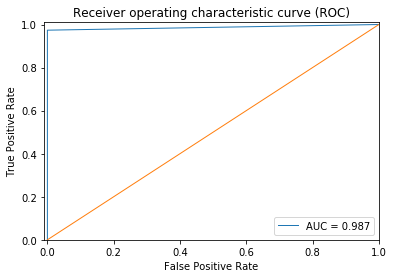

In [41]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_pred1, test_labels)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=1, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=1)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
#################### BaggingClassifier ###################

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
n_estimators = 10
start_time = time.time()
svm = BaggingClassifier(base_estimator=SVC(kernel='poly', C=1000, gamma='scale', max_iter=1000000), max_samples=1.0 / n_estimators, n_estimators=n_estimators, n_jobs=n_workers)
svm.fit(train_data, train_labels)
y_pred_2 = svm.predict(test_data)
accurracy_2= accuracy_score(test_labels, y_pred_2)  
fscore_2= f1_score(test_labels, y_pred_2 ) 
precision_2= precision_score(test_labels, y_pred_2)                              
recall_2 = recall_score(test_labels, y_pred_2)
elapsed_time_2 = time.time() - start_time                        

In [44]:
accurracy_2,  precision_2, recall_2, fscore_2, elapsed_time_2

(0.92, 0.8740157480314961, 1.0, 0.9327731092436975, 2.1372478008270264)

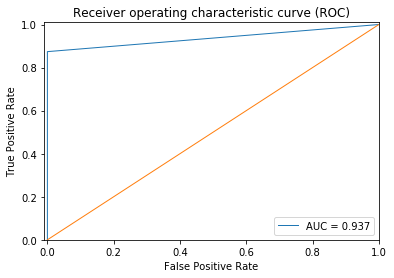

In [45]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_pred_2, test_labels)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=1, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=1)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()